In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

The mediation chain:

High completion today → Positive affect today
Positive affect today → Higher completion tomorrow (on similar goals)
Does affect explain the momentum effect?

Or the moderation:

Momentum might be STRONGER when people feel good after completing goals
Or WEAKER if positive affect signals "time to relax"

___
First, I have many positive and negative measures of affect.
- How do I create composite scores for positive and negative affect?
- Lets start with correlation matrices for all affect measures.
___

In [6]:
def create_affect_heatmaps(df):
    """
    Create heatmaps for affect correlations
    """
    # Positive affect items
    pos_items = ['affect_pos_amused', 'affect_pos_appreciated', 'affect_pos_excited', 
                 'affect_pos_relaxedCalm', 'affect_pos_focused', 'affect_pos_happy', 
                 'affect_pos_hopeful', 'affect_pos_motivated']
    
    # Negative affect items
    neg_items = ['affect_neg_angry', 'affect_neg_ashamed', 'affect_neg_bored', 
                 'affect_neg_depressed', 'affect_neg_embarrassed', 'affect_neg_frustrated', 
                 'affect_neg_guilty', 'affect_neg_lazy', 'affect_neg_lonelyIsolated', 
                 'affect_neg_nervousAnxious', 'affect_neg_sad', 'affect_neg_stressed']
    
    # Clean labels for display
    pos_labels = ['Amused', 'Appreciated', 'Excited', 'Relaxed/Calm', 
                  'Focused', 'Happy', 'Hopeful', 'Motivated']
    
    neg_labels = ['Angry', 'Ashamed', 'Bored', 'Depressed', 'Embarrassed', 
                  'Frustrated', 'Guilty', 'Lazy', 'Lonely', 'Anxious', 'Sad', 'Stressed']
    
    # Calculate correlations
    pos_corr = df[pos_items].corr()
    neg_corr = df[neg_items].corr()
    all_corr = df[pos_items + neg_items].corr()
    
    # Set up figure with 3 subplots
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    # Heatmap 1: Positive affect intercorrelations
    sns.heatmap(pos_corr, annot=True, fmt='.2f', cmap='RdYlGn', center=0,
                vmin=-1, vmax=1, square=True, ax=axes[0],
                xticklabels=pos_labels, yticklabels=pos_labels,
                cbar_kws={'label': 'Correlation'})
    axes[0].set_title('Positive Affect Intercorrelations', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('')
    axes[0].set_ylabel('')
    
    # Heatmap 2: Negative affect intercorrelations
    sns.heatmap(neg_corr, annot=True, fmt='.2f', cmap='RdYlGn', center=0,
                vmin=-1, vmax=1, square=True, ax=axes[1],
                xticklabels=neg_labels, yticklabels=neg_labels,
                cbar_kws={'label': 'Correlation'})
    axes[1].set_title('Negative Affect Intercorrelations', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')
    
    # Heatmap 3: Full correlation matrix
    all_labels = pos_labels + neg_labels
    sns.heatmap(all_corr, annot=False, cmap='RdYlGn', center=0,
                vmin=-1, vmax=1, square=True, ax=axes[2],
                xticklabels=all_labels, yticklabels=all_labels,
                cbar_kws={'label': 'Correlation'})
    axes[2].set_title('All Affect Items (Pos & Neg)', fontsize=14, fontweight='bold')
    axes[2].set_xlabel('')
    axes[2].set_ylabel('')
    
    # Add dividing line between positive and negative in full matrix
    axes[2].axhline(y=8, color='black', linewidth=2)
    axes[2].axvline(x=8, color='black', linewidth=2)
    
    plt.tight_layout()
    plt.savefig('affect_correlation_heatmaps.png', dpi=300, bbox_inches='tight')
    print("✓ Saved heatmaps to 'affect_correlation_heatmaps.png'")
    plt.show()
    
    return pos_corr, neg_corr, all_corr


def create_simple_heatmap(df, items, labels, title, filename):
    """
    Create a single clean heatmap
    """
    corr = df[items].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='RdYlGn', center=0,
                vmin=-1, vmax=1, square=True,
                xticklabels=labels, yticklabels=labels,
                cbar_kws={'label': 'Correlation'})
    plt.title(title, fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"✓ Saved to '{filename}'")
    plt.show()


# USAGE:

# Option 1: Create all 3 heatmaps at once
# pos_corr, neg_corr, all_corr = create_affect_heatmaps(df_affect)

# Option 2: Create individual heatmaps
# Positive items only
# pos_items = ['affect_pos_amused', 'affect_pos_appreciated', 'affect_pos_excited', 
#              'affect_pos_relaxedCalm', 'affect_pos_focused', 'affect_pos_happy', 
#              'affect_pos_hopeful', 'affect_pos_motivated']
# pos_labels = ['Amused', 'Appreciated', 'Excited', 'Relaxed', 'Focused', 
#               'Happy', 'Hopeful', 'Motivated']
# create_simple_heatmap(df_affect, pos_items, pos_labels, 
#                       'Positive Affect Intercorrelations', 
#                       'pos_affect_heatmap.png')

In [7]:
df_affect = pd.read_csv("../../results/affectDF_wide.csv")

✓ Saved heatmaps to 'affect_correlation_heatmaps.png'


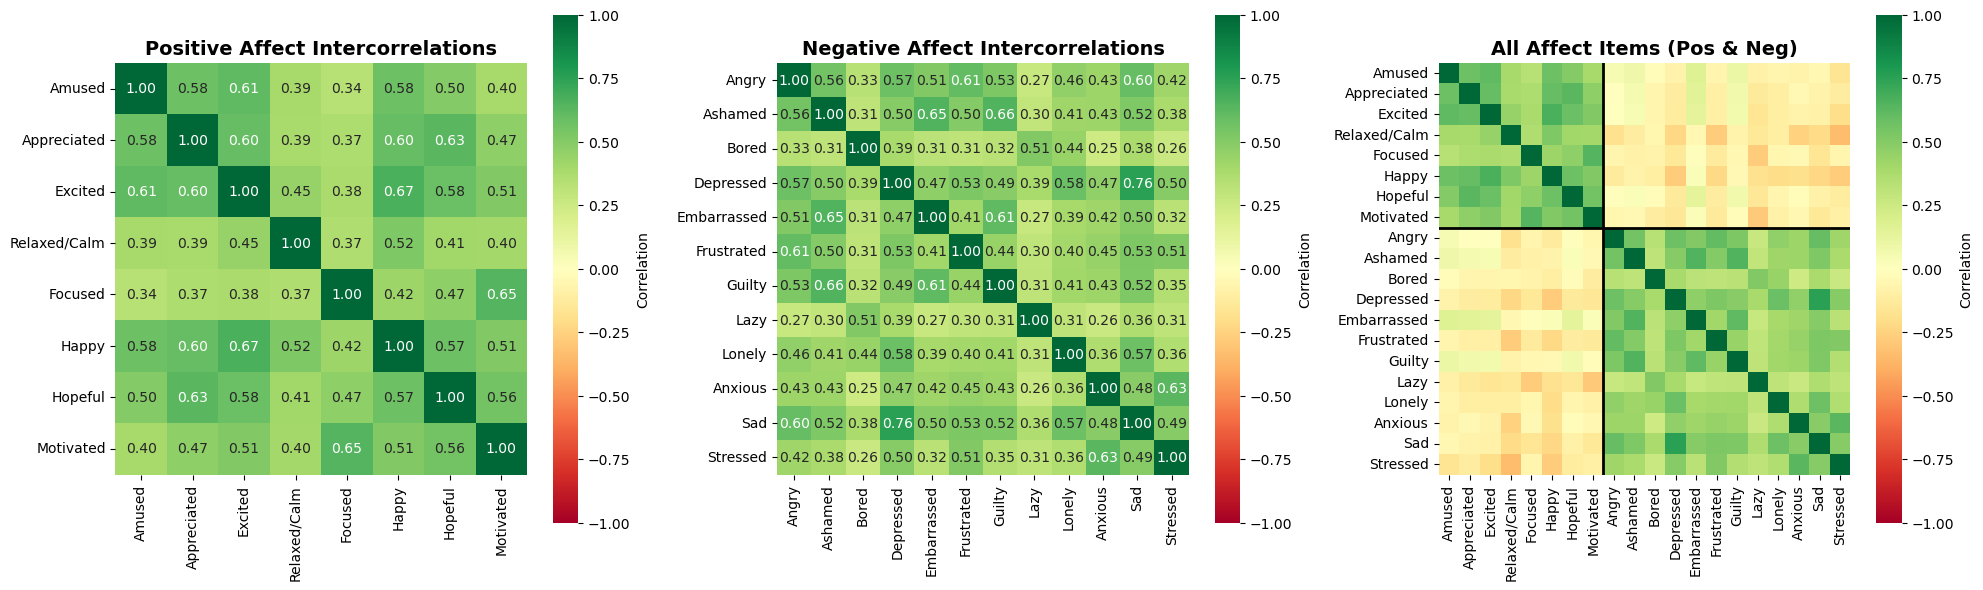

In [8]:
corr_results = create_affect_heatmaps(df_affect)

In [9]:
def cronbach_alpha(items_df):
    """Calculate Cronbach's alpha"""
    items_df = items_df.dropna()
    item_vars = items_df.var(axis=0, ddof=1)
    total_var = items_df.sum(axis=1).var(ddof=1)
    n_items = items_df.shape[1]
    alpha = n_items / (n_items - 1) * (1 - item_vars.sum() / total_var)
    return alpha

# Calculate for positive affect
pos_items = ['affect_pos_amused', 'affect_pos_appreciated', 'affect_pos_excited', 
             'affect_pos_relaxedCalm', 'affect_pos_focused', 'affect_pos_happy', 
             'affect_pos_hopeful', 'affect_pos_motivated']
alpha_pos = cronbach_alpha(df_affect[pos_items])
print(f"Positive affect α = {alpha_pos:.3f}")

# Calculate for negative affect
neg_items = ['affect_neg_angry', 'affect_neg_ashamed', 'affect_neg_bored', 
             'affect_neg_depressed', 'affect_neg_embarrassed', 'affect_neg_frustrated', 
             'affect_neg_guilty', 'affect_neg_lazy', 'affect_neg_lonelyIsolated', 
             'affect_neg_nervousAnxious', 'affect_neg_sad', 'affect_neg_stressed']
alpha_neg = cronbach_alpha(df_affect[neg_items])
print(f"Negative affect α = {alpha_neg:.3f}")

Positive affect α = 0.889
Negative affect α = 0.903


___  
- Correlation analyses revealed strong intercorrelations among positive affect items (r = 0.34-0.67) and negative affect items (r = 0.25-0.76), with near-zero cross-correlations between positive and negative dimensions (mean r = -0.05)

- Internal consistency was excellent for both scales: positive affect (8 items, α = 0.89) and negative affect (12 items, α = 0.90). 

- Composite scores were created by averaging items within each scale for use in subsequent analyses.
___

In [10]:
def create_affect_means(df):
    """
    Create mean positive and negative affect columns, keep only essential columns
    """
    # Positive affect items
    pos_items = ['affect_pos_amused', 'affect_pos_appreciated', 'affect_pos_excited', 
                 'affect_pos_relaxedCalm', 'affect_pos_focused', 'affect_pos_happy', 
                 'affect_pos_hopeful', 'affect_pos_motivated']
    
    # Negative affect items
    neg_items = ['affect_neg_angry', 'affect_neg_ashamed', 'affect_neg_bored', 
                 'affect_neg_depressed', 'affect_neg_embarrassed', 'affect_neg_frustrated', 
                 'affect_neg_guilty', 'affect_neg_lazy', 'affect_neg_lonelyIsolated', 
                 'affect_neg_nervousAnxious', 'affect_neg_sad', 'affect_neg_stressed']
    
    # Create mean scores
    df['pos_affect'] = df[pos_items].mean(axis=1)
    df['neg_affect'] = df[neg_items].mean(axis=1)
    df['affect_balance'] = df['pos_affect'] - df['neg_affect']
    
    # Keep only essential columns
    df_clean = df[['ParticipantIdentifier', 'trial_date', 
                    'pos_affect', 'neg_affect', 'affect_balance']].copy()
    
    print("✓ Created affect dataframe with mean scores")
    print(f"  Shape: {df_clean.shape}")
    print(f"\nColumns: {df_clean.columns.tolist()}")
    print(f"\nDescriptive statistics:")
    print(df_clean[['pos_affect', 'neg_affect', 'affect_balance']].describe().round(2))
    
    return df_clean

# Usage
df_affect_clean = create_affect_means(df_affect)

✓ Created affect dataframe with mean scores
  Shape: (12088, 5)

Columns: ['ParticipantIdentifier', 'trial_date', 'pos_affect', 'neg_affect', 'affect_balance']

Descriptive statistics:
       pos_affect  neg_affect  affect_balance
count    10375.00    10376.00        10375.00
mean         2.66        2.26            0.41
std          0.88        0.84            1.31
min          1.00        1.00           -4.00
25%          2.00        1.58           -0.33
50%          2.75        2.08            0.29
75%          3.25        2.92            1.21
max          5.00        5.00            4.00


In [12]:
def create_affect_lags(df_affect):
    """
    Create today and tomorrow affect columns for merging with goal data
    """
    df = df_affect.copy()
    df['trial_date'] = pd.to_datetime(df['trial_date'])
    
    # Sort by participant and date
    df = df.sort_values(['ParticipantIdentifier', 'trial_date'])
    
    # Create TODAY affect (just rename for clarity)
    df['today_pos_affect'] = df['pos_affect']
    df['today_neg_affect'] = df['neg_affect']
    # df['today_affect_balance'] = df['affect_balance']
    
    # Create TOMORROW affect (shift within participant)
    df['tomorrow_pos_affect'] = df.groupby('ParticipantIdentifier')['pos_affect'].shift(-1)
    df['tomorrow_neg_affect'] = df.groupby('ParticipantIdentifier')['neg_affect'].shift(-1)
    # df['tomorrow_affect_balance'] = df.groupby('ParticipantIdentifier')['affect_balance'].shift(-1)
    
    # Keep all columns
    df_final = df[['ParticipantIdentifier', 'trial_date',
                    'today_pos_affect', 'today_neg_affect',
                    'tomorrow_pos_affect', 'tomorrow_neg_affect']].copy()
    
    print("✓ Created affect dataframe with today and tomorrow columns")
    print(f"  Shape: {df_final.shape}")
    print(f"\nColumns: {df_final.columns.tolist()}")
    
    # Check how many missing tomorrow values (last day for each participant)
    n_missing = df_final['tomorrow_pos_affect'].isna().sum()
    print(f"\nMissing tomorrow affect: {n_missing} rows (last day per participant)")
    
    return df_final

# Usage
df_affect_final = create_affect_lags(df_affect_clean)

✓ Created affect dataframe with today and tomorrow columns
  Shape: (12088, 6)

Columns: ['ParticipantIdentifier', 'trial_date', 'today_pos_affect', 'today_neg_affect', 'tomorrow_pos_affect', 'tomorrow_neg_affect']

Missing tomorrow affect: 1875 rows (last day per participant)


In [13]:
df_affect_final.head()

,ParticipantIdentifier,trial_date,today_pos_affect,today_neg_affect,tomorrow_pos_affect,tomorrow_neg_affect
6545,0151d9f1-1644-4437-805e-02f5e244a690,2023-01-30,4.125,1.500000,3.500,1.666667
6546,0151d9f1-1644-4437-805e-02f5e244a690,2023-01-31,3.500,1.666667,2.000,2.583333
6547,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-01,2.000,2.583333,3.625,1.583333
6548,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-02,3.625,1.583333,4.375,1.416667
6549,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-03,4.375,1.416667,4.375,1.416667


In [16]:
df_reg = pd.read_csv("../../data/proc/reg_ready.csv")

In [19]:
def merge_goals_and_affect(df_reg, df_affect_final):
    """
    Merge goal/completion data with affect data
    """
    # Ensure trial_date is datetime in both
    df_reg['trial_date'] = pd.to_datetime(df_reg['trial_date'])
    df_affect_final['trial_date'] = pd.to_datetime(df_affect_final['trial_date'])
    
    # Merge
    df_merged = df_reg.merge(
        df_affect_final,
        on=['ParticipantIdentifier', 'trial_date'],
        how='left'
    )
    
    print("✓ Merged goal and affect data")
    print(f"  Original goal data: {df_reg.shape}")
    print(f"  Affect data: {df_affect_final.shape}")
    print(f"  Merged data: {df_merged.shape}")
    
    # Check for missing affect data
    n_missing_today = df_merged['today_pos_affect'].isna().sum()
    n_missing_tomorrow = df_merged['tomorrow_pos_affect'].isna().sum()
    
    print(f"\nMissing affect data:")
    print(f"  Today's affect: {n_missing_today} rows ({n_missing_today/len(df_merged)*100:.1f}%)")
    print(f"  Tomorrow's affect: {n_missing_tomorrow} rows ({n_missing_tomorrow/len(df_merged)*100:.1f}%)")
    
    # Show new columns
    affect_cols = [col for col in df_merged.columns if 'affect' in col]
    print(f"\nAffect columns added: {affect_cols}")
    
    return df_merged

# Usage
df_final = merge_goals_and_affect(df_reg, df_affect_final)

✓ Merged goal and affect data
  Original goal data: (14660, 25)
  Affect data: (12088, 6)
  Merged data: (14660, 29)

Missing affect data:
  Today's affect: 28 rows (0.2%)
  Tomorrow's affect: 26 rows (0.2%)

Affect columns added: ['today_pos_affect', 'today_neg_affect', 'tomorrow_pos_affect', 'tomorrow_neg_affect']


In [26]:
df_final = df_final.dropna().reset_index(drop=True)
len(df_final)

14606

In [27]:
df_final.head()

,ParticipantIdentifier,trial_date,tomorrow_goal,today_goal_1,today_goal_2,today_completion_1,today_completion_2,today_effort_1,today_effort_2,today_importance_1,...,max_sim_goal_completion_today,max_sim_goal_effort_today,max_sim_goal_importance_today,tomorrow_goal_completion,tomorrow_goal_effort,tomorrow_goal_importance,today_pos_affect,today_neg_affect,tomorrow_pos_affect,tomorrow_neg_affect
0,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-01,Keep working on psych paper,Keep working on psych paper,Finish chem prelab,71.0,100.0,5.0,3.0,6.0,...,71.0,5.0,6.0,100.0,6.0,7.0,2.000,2.583333,3.625,1.583333
1,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-01,Review bio questions,Keep working on psych paper,Finish chem prelab,71.0,100.0,5.0,3.0,6.0,...,100.0,3.0,5.0,77.0,4.0,3.0,2.000,2.583333,3.625,1.583333
2,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-02,Finish and hand in psych rough draft,Keep working on psych paper,Review bio questions,100.0,77.0,6.0,4.0,7.0,...,100.0,6.0,7.0,100.0,5.0,5.0,3.625,1.583333,4.375,1.416667
3,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-02,Create quick bio lecture notes,Keep working on psych paper,Review bio questions,100.0,77.0,6.0,4.0,7.0,...,77.0,4.0,3.0,100.0,6.0,5.0,3.625,1.583333,4.375,1.416667
4,0151d9f1-1644-4437-805e-02f5e244a690,2023-02-03,Practice biology FSG questions,Finish and hand in psych rough draft,Create quick bio lecture notes,100.0,100.0,5.0,6.0,5.0,...,100.0,6.0,5.0,90.0,5.0,5.0,4.375,1.416667,4.375,1.416667


___
MODEL 1: 
___

In [28]:
import pandas as pd
import numpy as np
from statsmodels.regression.mixed_linear_model import MixedLM

# Model: Does affect tomorrow predict completion tomorrow?
model = MixedLM.from_formula(
    'tomorrow_goal_completion ~ tomorrow_pos_affect',
    data=df_final,
    groups=df_final['ParticipantIdentifier']
)

result = model.fit(reml=True)
print(result.summary())

                Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: tomorrow_goal_completion
No. Observations: 14606   Method:             REML                    
No. Groups:       112     Scale:              1207.6290               
Min. group size:  60      Log-Likelihood:     -72708.2579             
Max. group size:  164     Converged:          Yes                     
Mean group size:  130.4                                               
-----------------------------------------------------------------------
                        Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-----------------------------------------------------------------------
Intercept               43.054     1.815  23.726  0.000  39.498  46.611
tomorrow_pos_affect      7.285     0.505  14.413  0.000   6.294   8.276
Group Var              157.833     0.650                               



In [29]:
import pandas as pd
import numpy as np
from statsmodels.regression.mixed_linear_model import MixedLM

# Model: Does affect tomorrow predict completion tomorrow?
model = MixedLM.from_formula(
    'tomorrow_goal_completion ~ tomorrow_neg_affect',
    data=df_final,
    groups=df_final['ParticipantIdentifier']
)

result = model.fit(reml=True)
print(result.summary())

                Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: tomorrow_goal_completion
No. Observations: 14606   Method:             REML                    
No. Groups:       112     Scale:              1219.2247               
Min. group size:  60      Log-Likelihood:     -72780.9200             
Max. group size:  164     Converged:          Yes                     
Mean group size:  130.4                                               
-----------------------------------------------------------------------
                        Coef.   Std.Err.    z     P>|z|  [0.025  0.975]
-----------------------------------------------------------------------
Intercept               71.638     1.740  41.174  0.000  68.228  75.048
tomorrow_neg_affect     -4.187     0.541  -7.744  0.000  -5.247  -3.127
Group Var              168.567     0.690                               



In [37]:
# ============================================================================
# STEP 1: Does momentum predict affect tomorrow?
# ============================================================================

def test_momentum_to_affect(df):
    """
    Test if momentum (high completion today on similar goals) → positive affect tomorrow
    Model: tomorrow_pos_affect ~ max_sim_goal_completion_today × max_sim_tomorrow_with_today
    """
    print("="*80)
    print("STEP 1: Does momentum predict positive affect tomorrow?")
    print("Model: tomorrow_pos_affect ~ today_completion × similarity")
    print("="*80)
    print("\nHypothesis: When people complete similar goals highly, they feel better the next day")
    print("="*80 + "\n")
    
    model = MixedLM.from_formula(
        'tomorrow_pos_affect ~ max_sim_goal_completion_today * max_sim_tomorrow_with_today',
        data=df,
        groups=df['ParticipantIdentifier']
    )
    
    result = model.fit(reml=True)
    print(result.summary())
    
    # Extract key coefficients
    interaction = result.params['max_sim_goal_completion_today:max_sim_tomorrow_with_today']
    interaction_pval = result.pvalues['max_sim_goal_completion_today:max_sim_tomorrow_with_today']
    
    print("\n" + "="*80)
    print("INTERPRETATION:")
    print("="*80)
    
    if interaction_pval < 0.05:
        if interaction > 0:
            print(f"✓ YES: Momentum predicts HIGHER positive affect tomorrow")
            print(f"  Interaction: β = {interaction:.5f}, p = {interaction_pval:.4f}")
            print(f"  → Completing similar goals today makes people feel better tomorrow")
        else:
            print(f"✗ OPPOSITE: Momentum predicts LOWER affect tomorrow")
            print(f"  Interaction: β = {interaction:.5f}, p = {interaction_pval:.4f}")
    else:
        print(f"✗ NO: Momentum doesn't predict tomorrow's affect")
        print(f"  Interaction: β = {interaction:.5f}, p = {interaction_pval:.4f}")
    
    return result

In [41]:
def identify_continuation_goals(df_reg, completion_percentile=90, sim_threshold=0.80):
    """
    Identify goals that are continuations from previous day
    Based on: 
    - same_as_tomorrow == True AND 
    - low completion today (< 90th percentile for that participant) AND
    - high similarity (> 0.80)
    """
    df_reg = df_reg.copy()
    
    # Calculate percentile threshold for each participant
    participant_threshold = df_reg.groupby('ParticipantIdentifier')['max_sim_goal_completion_today'].quantile(completion_percentile/100)
    
    # Map back to dataframe
    df_reg['completion_threshold'] = df_reg['ParticipantIdentifier'].map(participant_threshold)
    
    # Create binary indicators
    df_reg['is_same_as_tomorrow'] = df_reg['max_sim_same_as_tomorrow']
    df_reg['low_completion'] = df_reg['max_sim_goal_completion_today'] < df_reg['completion_threshold']
    df_reg['high_similarity'] = df_reg['max_sim_tomorrow_with_today'] > sim_threshold
    
    # Continuation = all three criteria
    df_reg['is_continuation'] = (
        df_reg['is_same_as_tomorrow'] & 
        df_reg['low_completion'] & 
        df_reg['high_similarity']
    )
    
    print(f"Total observations: {len(df_reg)}")
    print(f"Same as tomorrow: {df_reg['is_same_as_tomorrow'].sum()} ({df_reg['is_same_as_tomorrow'].mean()*100:.1f}%)")
    print(f"Low completion (<{completion_percentile}th percentile): {df_reg['low_completion'].sum()} ({df_reg['low_completion'].mean()*100:.1f}%)")
    print(f"High similarity (>{sim_threshold}): {df_reg['high_similarity'].sum()} ({df_reg['high_similarity'].mean()*100:.1f}%)")
    print(f"Continuation goals (all three): {df_reg['is_continuation'].sum()} ({df_reg['is_continuation'].mean()*100:.1f}%)")
    print(f"Non-continuation goals: {(~df_reg['is_continuation']).sum()} ({(~df_reg['is_continuation']).mean()*100:.1f}%)")
    
    return df_reg


# Usage:
# Add continuation flag
df_final = identify_continuation_goals(df_final, completion_percentile=90, sim_threshold=0.80)

# Filter to NON-continuation goals
df_non_cont = df_final[df_final['is_continuation'] == False].copy()
df_cont = df_final[df_final['is_continuation'] == True].copy()
print(f"\nNon-continuation sample: {len(df_non_cont)} observations")

# Now run your affect analysis on non-continuation goals
# model = MixedLM.from_formula(
#     'tomorrow_pos_affect ~ max_sim_goal_completion_today * max_sim_tomorrow_with_today',
#     data=df_non_cont,
#     groups=df_non_cont['ParticipantIdentifier']
# )

Total observations: 14606
Same as tomorrow: 5249 (35.9%)
Low completion (<90th percentile): 10076 (69.0%)
High similarity (>0.8): 3602 (24.7%)
Continuation goals (all three): 2786 (19.1%)
Non-continuation goals: 11820 (80.9%)

Non-continuation sample: 11820 observations


In [50]:
test_momentum_to_affect(df_non_cont)

STEP 1: Does momentum predict positive affect tomorrow?
Model: tomorrow_pos_affect ~ today_completion × similarity

Hypothesis: When people complete similar goals highly, they feel better the next day

                               Mixed Linear Model Regression Results
Model:                         MixedLM            Dependent Variable:            tomorrow_pos_affect
No. Observations:              11820              Method:                        REML               
No. Groups:                    112                Scale:                         0.2957             
Min. group size:               36                 Log-Likelihood:                -9876.6860         
Max. group size:               156                Converged:                     Yes                
Mean group size:               105.5                                                                
----------------------------------------------------------------------------------------------------
                      

In [36]:
df_final_non_cont = identify_continuation_goals(df_final)

KeyError: 'Column not found: today_goal_completion'

In [ ]:
test_momentum_to_affect(df_final)

In [51]:
def test_mediation(df):
    """
    Test if tomorrow's affect explains the momentum effect
    
    Compare:
    - Model A (without affect): tomorrow_completion ~ today_completion × similarity
    - Model B (with affect): tomorrow_completion ~ today_completion × similarity + tomorrow_affect
    
    If affect mediates, the interaction should weaken when we add affect
    """
    print("\n\n" + "="*80)
    print("STEP 3: Does tomorrow's affect mediate the momentum effect?")
    print("="*80)
    
    # Model A: Original momentum model (without affect)
    print("\nModel A (WITHOUT tomorrow's affect):")
    print("tomorrow_goal_completion ~ today_completion × similarity")
    print("-"*80 + "\n")
    
    model_a = MixedLM.from_formula(
        'tomorrow_goal_completion ~ max_sim_goal_completion_today * max_sim_tomorrow_with_today',
        data=df,
        groups=df['ParticipantIdentifier']
    )
    
    result_a = model_a.fit(reml=True)
    print(result_a.summary())
    
    interaction_a = result_a.params['max_sim_goal_completion_today:max_sim_tomorrow_with_today']
    pval_a = result_a.pvalues['max_sim_goal_completion_today:max_sim_tomorrow_with_today']
    
    # Model B: Momentum model WITH tomorrow's affect
    print("\n" + "="*80)
    print("\nModel B (WITH tomorrow's affect):")
    print("tomorrow_goal_completion ~ today_completion × similarity + tomorrow_pos_affect")
    print("-"*80 + "\n")
    
    model_b = MixedLM.from_formula(
        'tomorrow_goal_completion ~ max_sim_goal_completion_today * max_sim_tomorrow_with_today + tomorrow_pos_affect',
        data=df,
        groups=df['ParticipantIdentifier']
    )
    
    result_b = model_b.fit(reml=True)
    print(result_b.summary())
    
    interaction_b = result_b.params['max_sim_goal_completion_today:max_sim_tomorrow_with_today']
    pval_b = result_b.pvalues['max_sim_goal_completion_today:max_sim_tomorrow_with_today']
    affect_coef = result_b.params['tomorrow_pos_affect']
    affect_pval = result_b.pvalues['tomorrow_pos_affect']
    
    # Compare
    print("\n" + "="*80)
    print("MEDIATION TEST:")
    print("="*80)
    print(f"\nMomentum Effect (Completion × Similarity Interaction):")
    print(f"  Without affect: β = {interaction_a:.4f}, p = {pval_a:.4f}")
    print(f"  With affect:    β = {interaction_b:.4f}, p = {pval_b:.4f}")
    
    reduction = ((interaction_a - interaction_b) / interaction_a) * 100
    print(f"\n  Change: {reduction:.1f}% reduction")
    
    print(f"\nTomorrow's Affect Effect (in Model B):")
    print(f"  β = {affect_coef:.3f}, p = {affect_pval:.4f}")
    
    print("\n" + "="*80)
    print("INTERPRETATION:")
    print("="*80)
    
    if abs(reduction) > 20 and affect_pval < 0.05:
        print("\n✓ PARTIAL MEDIATION detected!")
        print(f"  → Affect reduces the momentum effect by {abs(reduction):.1f}%")
        print(f"  → Tomorrow's affect has a significant independent effect (β = {affect_coef:.3f}, p = {affect_pval:.4f})")
        print(f"\n  CONCLUSION: Momentum partially works through affect.")
        print(f"  When people complete similar goals today, they feel better tomorrow,")
        print(f"  which helps them complete tomorrow's goals.")
    elif abs(reduction) < 10 and affect_pval < 0.05:
        print("\n⚠ Affect predicts completion but does NOT mediate momentum")
        print(f"  → Momentum effect barely changes ({reduction:.1f}%)")
        print(f"  → Affect has independent effect (β = {affect_coef:.3f}, p = {affect_pval:.4f})")
        print(f"\n  CONCLUSION: Affect and momentum are separate pathways.")
    elif abs(reduction) > 20 and affect_pval >= 0.05:
        print("\n⚠ UNCLEAR:")
        print(f"  → Momentum reduced by {reduction:.1f}%, but affect not significant (p = {affect_pval:.3f})")
    else:
        print("\n✗ NO MEDIATION:")
        print(f"  → Momentum effect barely changes ({reduction:.1f}%)")
        print(f"  → Affect doesn't significantly predict completion (p = {affect_pval:.3f})")
        print(f"\n  CONCLUSION: Affect doesn't explain the momentum effect.")
        print(f"  Momentum operates independently of affective states.")
    
    return result_a, result_b

In [56]:
test_mediation(df_non_cont)



STEP 3: Does tomorrow's affect mediate the momentum effect?

Model A (WITHOUT tomorrow's affect):
tomorrow_goal_completion ~ today_completion × similarity
--------------------------------------------------------------------------------

                                Mixed Linear Model Regression Results
Model:                        MixedLM           Dependent Variable:           tomorrow_goal_completion
No. Observations:             11820             Method:                       REML                    
No. Groups:                   112               Scale:                        1236.1681               
Min. group size:              36                Log-Likelihood:               -58988.8100             
Max. group size:              156               Converged:                    Yes                     
Mean group size:              105.5                                                                   
-------------------------------------------------------------------------

(<statsmodels.regression.mixed_linear_model.MixedLMResultsWrapper at 0x166ab6550>,
 <statsmodels.regression.mixed_linear_model.MixedLMResultsWrapper at 0x166c37010>)